In [95]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [140]:
#Importing the csv file from factory io
data = pd.read_csv('C:/Users/a.sethu/Desktop/Python/moving2.csv')
df = pd.DataFrame(data)

In [ ]:
#Subseting all Light Array Emitter data
filteredLAE = df[df[' Name']=='Light Array Emitter 1 (Value)']
#converting the current value column to numeric
filteredLAE[' Current Value'] = pd.to_numeric(filteredLAE[' Current Value'])

In [ ]:
filteredLAE[' Sensor Value Difference'] = filteredLAE[' Current Value'].diff()
filteredLAE

In [137]:
filteredLAE.to_csv (r'C:\Users\a.sethu\Desktop\Python\export.csv', index = False, header=True)

In [143]:
#Filtering sensor trigger data points from the data by removing 
#all all data with current value = 0
filteredLAE = filteredLAE[filteredLAE[' Sensor Value Difference'] != 0]
filteredLAE = filteredLAE[filteredLAE[' Current Value']!=128 ]
filteredLAE = filteredLAE[filteredLAE[' Current Value']!=64 ]
#Dropping al NaN values
filteredLAE.dropna(subset = [' Sensor Value Difference'], inplace=True)
filteredLAE

,Sensor/Actuator,Data Type,Name,Address,Current Value,Time Elapsed,Sensor Value Difference
1909,Sensor,Int,Light Array Emitter 1 (Value),0,192,17.96656,64.0
2266,Sensor,Int,Light Array Emitter 1 (Value),0,0,20.07486,-192.0
2538,Sensor,Int,Light Array Emitter 1 (Value),0,192,21.68317,192.0
2912,Sensor,Int,Light Array Emitter 1 (Value),0,0,23.88313,-192.0
3694,Sensor,Int,Light Array Emitter 1 (Value),0,192,28.46640,128.0
...,...,...,...,...,...,...,...
679869,Sensor,Int,Light Array Emitter 1 (Value),0,192,4000.99300,192.0
680226,Sensor,Int,Light Array Emitter 1 (Value),0,0,4003.09300,-192.0
681076,Sensor,Int,Light Array Emitter 1 (Value),0,192,4008.08200,192.0
681450,Sensor,Int,Light Array Emitter 1 (Value),0,0,4010.25700,-192.0


In [144]:
filteredLAE[filteredLAE[' Sensor Value Difference'] > 0]
filteredLAE['Trigger Status']="Off"
filteredLAE['Trigger Status'] = filteredLAE.apply(lambda x: 'On' if x[' Sensor Value Difference']>0 else 'Off',axis=1)

In [145]:
filteredLAE['Trigger Interval'] = filteredLAE[" Time Elapsed"].diff(1)

In [146]:
preprocessedDF = filteredLAE[filteredLAE['Trigger Status']=='On']

In [ ]:
preprocessedDF['Trigger Interval'] = preprocessedDF[" Time Elapsed"].diff(1)
preprocessedDF.dropna(subset = ['Trigger Interval'], inplace=True)
preprocessedDF

([], [])

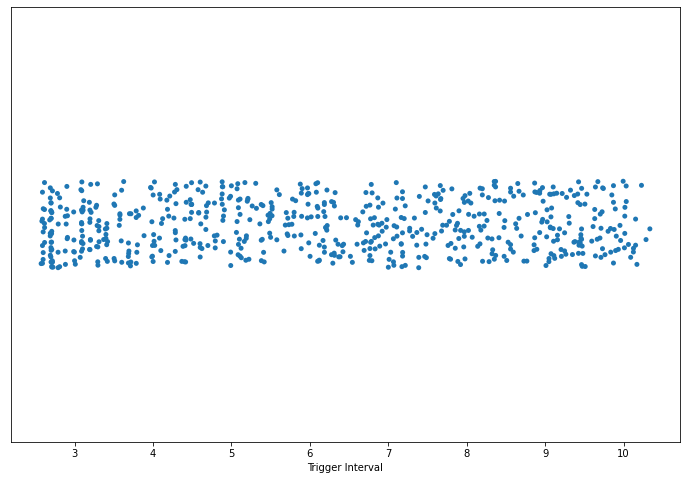

In [174]:
import seaborn as sns
preprocessedDF=preprocessedDF.reset_index(drop=True)
plt.figure(figsize=(12,8)) #Plotting the data points on the plot
sns.stripplot(x='Trigger Interval',data = preprocessedDF,jitter= True,edgecolor = 'None')
sns.despine
locs,labels = plt.xticks()
plt.yticks([])

In [189]:
import jenkspy
#Finding the breaks using the Jenks natural breaks optimzation method
breaks = jenkspy.jenks_breaks(preprocessedDF['Trigger Interval'],nb_class = 3)

In [190]:
breaks

[2.5729999999998654, 4.8159999999998035, 7.506499999999988, 10.333999999999833]

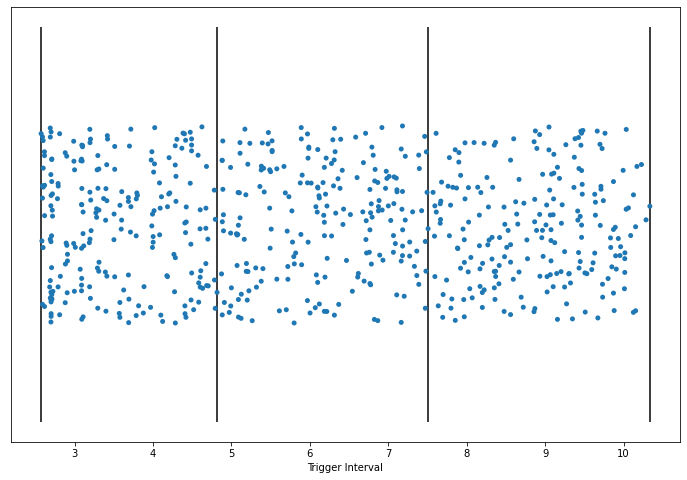

In [191]:
#seaborn library for plotting
import seaborn as sns
plt.figure(figsize=(12,8)) #Plotting the data points on the plot
sns.stripplot(x='Trigger Interval',data = preprocessedDF,jitter= True,edgecolor = 'None')
sns.despine
locs,labels = plt.xticks()
plt.yticks([])
#Drawing vertical lines usng the data points as x values
for b in breaks:
    plt.vlines(b,ymin= -0.2,ymax=0.2,color='k')

<AxesSubplot:xlabel='Trigger Interval'>

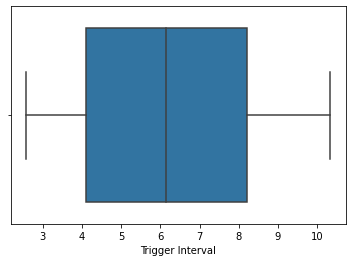

In [192]:
#Box plot
import numpy as np
sns.boxplot(x='Trigger Interval', data=preprocessedDF, whis=np.inf)

In [171]:
#All code below this is tp be ignored was used only for research purposes
#Removing data outside the range of3.8 to 8.7 for testing purposes
dumydata = preprocessedDF[preprocessedDF['Trigger Interval']>3.8]
dumydata = dumydata[dumydata['Trigger Interval']<8.7]

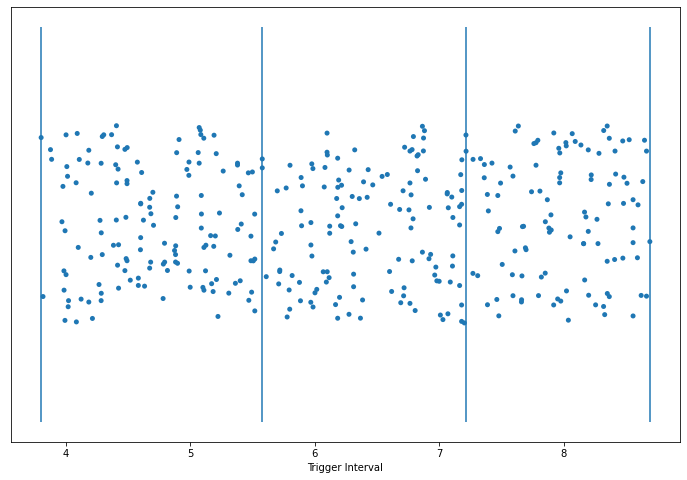

In [173]:
dumydata=dumydata.reset_index(drop=True)
import jenkspy
#Finding the breaks using the Jenks natural breaks optimzation method
breaks = jenkspy.jenks_breaks(dumydata['Trigger Interval'],nb_class = 3)
#seaborn library for plotting
import seaborn as sns
plt.figure(figsize=(12,8)) #Plotting the data points on the plot
sns.stripplot(x='Trigger Interval',data = dumydata,jitter= True,edgecolor = 'None')
sns.despine
locs,labels = plt.xticks()
plt.yticks([])
#Drawing vertical lines usng the data points as x values
for b in breaks:
    plt.vlines(b,ymin= -0.2,ymax=0.2)